# SCS_3251_049 Statistics for Data Science - Assignment 1
## Adriano Motta Marson


__Question:__ Write the code to implement the data simulation demonstrated in the above mentioned video. Calculate the probability of obtaining the experiment outcome.

In this assignment, you will be writing code to implement a permutation test.

This assignment demonstrates the main idea of statistical inference, which will be discussed in detail later in the course. However, we do not need a solid theoretical background to answer the questions in this assignment. To find if the experimentally observed difference (approx. 4.4) between two subsets is statistically significant, we need to calculate the probability of observing this difference by chance. In other words, you will need to calculate how likely it is to obtain the outcome just by chance, when there is no association. (e.g. Beer consumption does not attract more mosquitos, etc)
 
To find this probability, we will need a large number of experiments. But we don't have them. We have only 1 experiment with 43 volunteers (25 in beer and 18 in water subgroups).  To solve the problem, we may simulate this experiment. First of all, we assume that there is no difference and the outcome is just by chance. If the assumption is true, then there is no difference between observations in subgroups and any number from the beer group could be in the water group, and vice versa. It implies that we may randomly shuffle data - move numbers between subgroups and each time compute the average number for each subgroup and take their difference. In the end, we should get the distribution of experimental outcomes or the results of many simulated experiments. This is called a permutation test.

After that, we could just count the number of experiments with outcome 4.4 and find the probability as (# of experiments with diff =4.4)/(total number of experiments). In this case, the total number of experiments serves as the number of trials and the number of experiments with outcome 4.4 serves as the number of plausible outcomes. __Note: round the difference to the first decimal.__

Since it was assumed that there is no difference and data were randomly shuffled, this probability will show us the likelihood of having obtained this outcome by chance.

There are many ways to implement the data swap between two arrays. It may be the 'shuffle()' method from 'numpy.random'. For two arrays 'array1' of length 25 and 'array2' of length 18 we may:
1. concatenate them to form a combined array
2. shuffle combined array: numpy.random.shuffle(combined)
3. split the shuffled array into two arrays of length 25 and 18. Now we have a new 'experiment'. Calculate the mean for each array and take the difference.
4. repeat approximetaly 10,000 times and count number of simulations with difference >= 4.4.

Other ways to swap data would be to use numpy.random.permutation() or write a function to swap a random number of items between arrays.

If the latter probability is too small, one can conclude that it is very unlikely to get such an observation by chance and the skeptical ‘no association’ hypothesis can be rejected. Usually, this probability is compared to the preset significance level.   

Here, assuming no association means that data from two parts of dataset can be shuffled. If there is no association any observation (number of mosquitos attracted to volunteer) from 'beer' group could come from the 'water' group and vice versa. No association assumption means that these observations could be randomly shuffled. Say you did between 1000 and 10000 shuffles every time the mean for each subgroup is computed and the mean difference is found. So in the end the array of the mean differences is expected (say 1000 in length).

One can compute how many times the experimental difference ( approx. 4.4) occurs in the simulated array. Or better compute how many items in simulated array have values larger than 4.4.  Then the probability is ratio of number of items divided by the length of array.

Why the second option is more suitable will become clear later in the course. For the first assignment either option of calculating probabilities is acceptable.  

In [1]:
# Import Numpy library, rename as "np"
import numpy as np
# Import Pandas library, rename as "pd"
import pandas as pd
# Import pyplot from matplot, rename as "pd"
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

In [2]:
# read dataset
df_mosquito = pd.read_csv('mosquitos_data.csv')

In [3]:
# check dataset info
df_mosquito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Response   43 non-null     int64 
 1   Treatment  43 non-null     object
dtypes: int64(1), object(1)
memory usage: 816.0+ bytes


In [4]:
df_mosquito.head(10)

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer
5,31,Beer
6,24,Beer
7,21,Beer
8,20,Beer
9,19,Beer


In [5]:
# verify count of each group
df_mosquito.groupby(['Treatment'])['Treatment'].count()

Treatment
Beer     25
Water    18
Name: Treatment, dtype: int64

<AxesSubplot:xlabel='Treatment', ylabel='Response'>

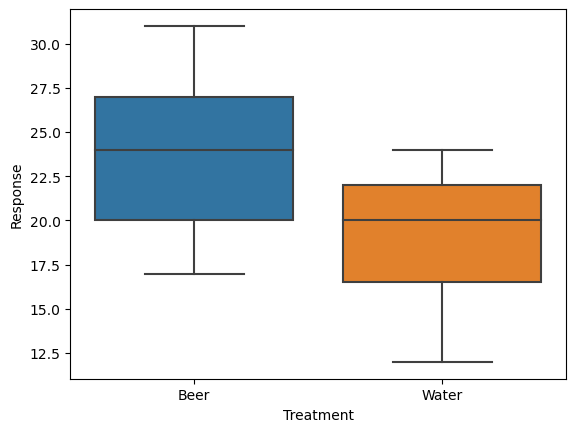

In [5]:
# boxplot for the number of mosquitos in each group
sns.boxplot(x="Treatment", y="Response", data=df_mosquito)

In [6]:
# basic statistc for beer response
print("Beer Response")
print("Mean: ",df_mosquito[df_mosquito['Treatment'] == 'Beer']['Response'].mean())
print("Median: ",df_mosquito[df_mosquito['Treatment'] == 'Beer']['Response'].median())
print("Standard Deviation: ",df_mosquito[df_mosquito['Treatment'] == 'Beer']['Response'].std())

Beer Response
Mean:  23.6
Median:  24.0
Standard Deviation:  4.133198922545748


In [7]:
# basic statistc for water response
print("Water Response")
print("Mean: ",df_mosquito[df_mosquito['Treatment'] == 'Water']['Response'].mean())
print("Median: ",df_mosquito[df_mosquito['Treatment'] == 'Water']['Response'].median())
print("Standard Deviation: ",df_mosquito[df_mosquito['Treatment'] == 'Water']['Response'].std())

Water Response
Mean:  19.22222222222222
Median:  20.0
Standard Deviation:  3.6711202899124045


<b>According to the data, beer consumption makes the individual more attractive to mosquitoes, where the average attractiveness is 23.6 against 19.22 for individuals who consumed water as can be seen also in the graph. We can also observe the existence of a slightly larger standard deviation for the group that drank beer.</b>

In [8]:
# array of all response
arr_mosquito = np.asarray(df_mosquito["Response"])

In [9]:
mean_original = round(np.mean(df_mosquito[df_mosquito['Treatment'] == 'Beer']['Response'])
             -np.mean(df_mosquito[df_mosquito['Treatment'] == 'Water']['Response']),1)
print("Difference: ", mean_original)

Difference:  4.4


In [10]:
# simulation with permutation test

N = 10000 # number of repeats

# number of treatment = beer 
n = df_mosquito[df_mosquito['Treatment'] == 'Beer']['Response'].count()

# variable to store times of diference >= 4.4
sup4_4 = 0

# array to store all differences
allDiferences = np.array([])


# loop
for i in range(N):
    # shuffle the array items
    mosquito = np.random.permutation(arr_mosquito)
    
    # split into two subgroups and compute the difference of means
    mean_p = round(np.mean(mosquito[:n]) - np.mean(mosquito[n:]),1)
    
    if mean_p >= mean_original:
        sup4_4 += 1

    # append the current mean to the arrays of results
    allDiferences = np.append(allDiferences, mean_p)


# result
print("Superior or iqual to 4.4: ", sup4_4)
print("Probability: ", sup4_4/N)

Superior or iqual to 4.4:  7
Probability:  0.0007


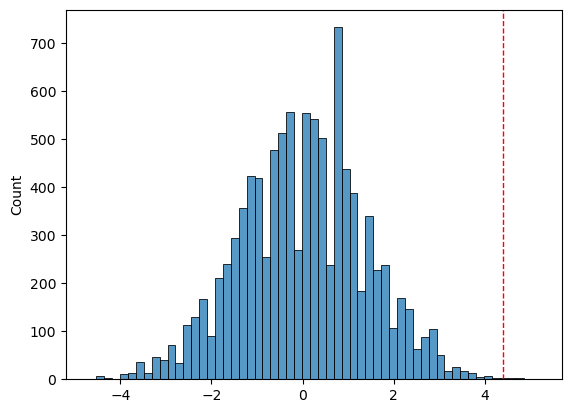

In [11]:
# histogram of permutation
sns.histplot(data=allDiferences)
# add line of 4.4
plt.axvline(linewidth=1, color='r', x=mean_original, linestyle='--')